In [1]:
import numpy as np
import pandas as pd
import yaml

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration file not found!")
        

In [3]:
df = pd.read_csv(config['input_data']['file'])
davy_df = df.copy()
davy_df

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,14.07,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,56.27,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,74.74,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,20.15,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,5.83,91,Yes,Stable
...,...,...,...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,22.38,53,Yes,Stable
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,74.51,57,Yes,Declining
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,50.85,82,No,Rising
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,25.93,66,No,Rising


In [4]:
davy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               1000 non-null   object 
 1   Genre                    1000 non-null   object 
 2   Platform                 1000 non-null   object 
 3   Release Year             1000 non-null   object 
 4   Developer                1000 non-null   object 
 5   Revenue (Millions $)     1000 non-null   float64
 6   Players (Millions)       1000 non-null   float64
 7   Peak Concurrent Players  1000 non-null   float64
 8   Metacritic Score         1000 non-null   int64  
 9   Esports Popularity       1000 non-null   object 
 10  Trending Status          1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [5]:
davy_df.duplicated().sum()

np.int64(0)

In [6]:
davy_df.duplicated().any()

np.False_

In [7]:
davy_df.duplicated().any()

np.False_

In [8]:
import duplicate
# Remove duplicate rows
davy_df_clean = duplicate.remove_duplicate_rows(davy_df, keep="first")
display(davy_df_clean)

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,14.07,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,56.27,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,74.74,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,20.15,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,5.83,91,Yes,Stable
...,...,...,...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,22.38,53,Yes,Stable
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,74.51,57,Yes,Declining
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,50.85,82,No,Rising
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,25.93,66,No,Rising


In [9]:
# standardiser (normalise ) columns names for SQL
davy_df.columns = (
    davy_df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^a-zA-Z0-9_]", "", regex = True)
)

In [10]:
# outlier handling 


In [11]:
davy_df.describe()

,revenue_millions_,players_millions,peak_concurrent_players,metacritic_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2483.017800,103.499820,31.602150,74.990000
std,1412.629451,58.869562,23.023375,14.618536
min,11.430000,0.530000,0.110000,50.000000
25%,1276.190000,52.005000,12.967500,62.000000
50%,2476.130000,107.040000,26.405000,76.000000
75%,3677.797500,155.632500,46.020000,87.000000
max,4999.790000,199.980000,96.620000,100.000000


In [12]:
davy_df.describe()

,revenue_millions_,players_millions,peak_concurrent_players,metacritic_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2483.017800,103.499820,31.602150,74.990000
std,1412.629451,58.869562,23.023375,14.618536
min,11.430000,0.530000,0.110000,50.000000
25%,1276.190000,52.005000,12.967500,62.000000
50%,2476.130000,107.040000,26.405000,76.000000
75%,3677.797500,155.632500,46.020000,87.000000
max,4999.790000,199.980000,96.620000,100.000000


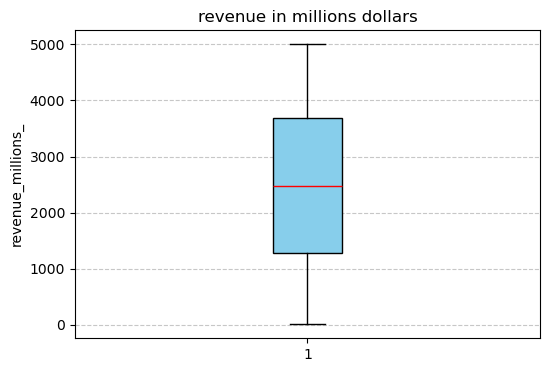

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from box_plot import box_plot
davy_df_outliers = box_plot(davy_df, column ="revenue_millions_", title="revenue in millions dollars", color="skyblue")

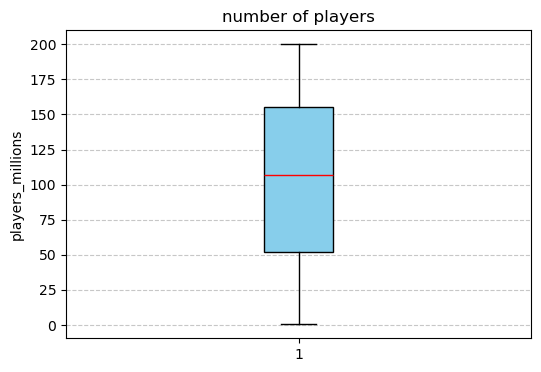

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from box_plot import box_plot
davy_df_outliers = box_plot(davy_df, column ="players_millions", title="number of players", color="skyblue")

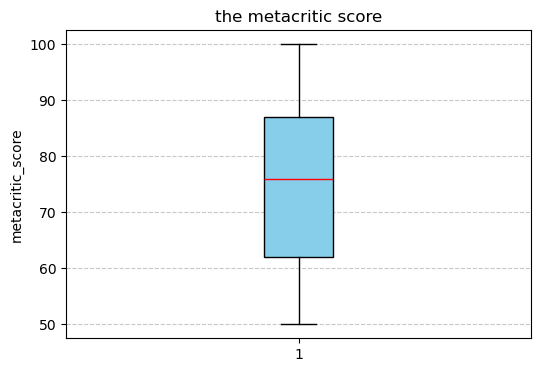

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from box_plot import box_plot
davy_df_outliers = box_plot(davy_df, column ="metacritic_score", title="the metacritic score", color="skyblue")